In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import re
import glob
import cv2
import os

In [66]:
import keras

C:\Users\JanU\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [67]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Convolution2D, Activation, Dropout
from keras.models import Sequential

In [3]:
DATASET_LOCATION = "English/Hnd/Img/"

In [4]:
img_height =32
img_width = 32

image_size_flat = img_height*img_width
img_shape = (img_height,img_width)

num_channel = 1# for Gray scale
num_classes = 62  # total 62 differenct chars

In [5]:
def create_argmax(folder_name):
    index= int(re.search("Sample(.*)", folder_name).group(1)) - 1
    arr = np.zeros(num_classes)
    arr[index]=1
    return arr

In [44]:
def cvt_img2np(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(32,32))
    return img

In [45]:
def cvt_img2np2(path):
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).reshape((28,28))

In [7]:
create_argmax("Sample006")

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [47]:
def get_dataset():
    DATASET_LOCATION = "English/Hnd/Img/"
    hcr = {"data":[], "labels":[], "cls":[]}
    for folder in glob.glob(DATASET_LOCATION + "/*"):
        if os.path.isdir(folder):
            for img_path in glob.glob(folder + "/*.png"):
                hcr.get('data').append(cvt_img2np(img_path))
                hcr.get('labels').append(create_argmax(folder))
                hcr.get('cls').append(int(folder[-3:]) - 1)
    print("read completed")
    permutate = np.random.permutation(len(hcr.get('data')))
    return {k1:v1[permutate] for k1, v1 in {k: np.array(v) for k, v in hcr.items()}.items()}

In [48]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == 9 and len(cls_true) == 9
    
    fig, axes = plt.subplots(3,3,figsize=(10,10))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        
        ax.imshow(images[i], cmap="binary")
        if cls_pred is None:
            xlabel = "True {0}".format(cls_true[i])
        else:
            xlabel = "True {0}, Pred {1}".format(cls_true[i], cls_pred[i])
    
        ax.set_xlabel(xlabel)
    
        ax.set_xticks([])
        ax.set_yticks([])

In [49]:
hcr = get_dataset()
len(hcr.get('data'))

read completed


3410

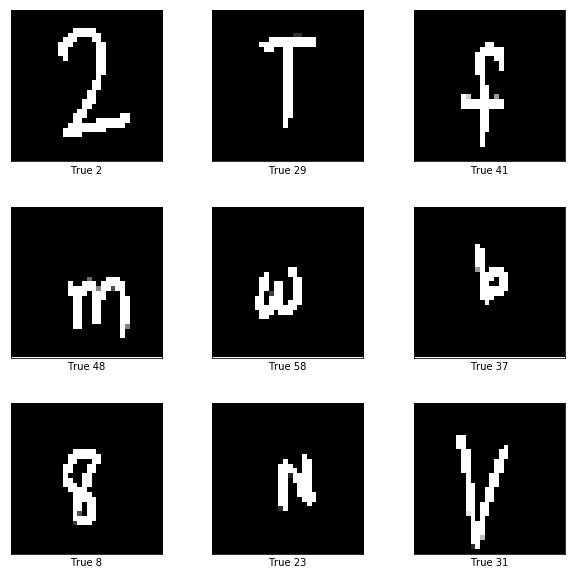

In [51]:
images = hcr.get("data")[3000:3009]
cls_true = hcr.get("cls")[3000:3009]
len(images)
plot_images(images=images, cls_true=cls_true)

In [52]:
hcr["labels"][90]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

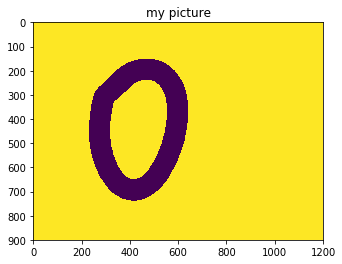

In [53]:
## Sample for my

from matplotlib import pyplot as plt
img = cv2.imread('English/Hnd/Img/Sample001/img001-001.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)
plt.title('my picture')
plt.show()

In [54]:
data = hcr["data"]
data = data.reshape((3410,1,32,32))

In [56]:
data = data.astype("float32")
data = data/255

In [58]:
labels = hcr["labels"]

In [59]:
data.shape

(3410, 1, 32, 32)

In [60]:
filters = 16
kernel_size = (3,3)
batch_size = 32
num_epochs = 5

In [68]:
Convolution2D

keras.layers.convolutional.Conv2D

In [69]:
conv_model = Sequential()

conv_model.add(Conv2D(filters, (3,3), padding="same", input_shape=(1,32,32)))
conv_model.add(Activation("relu"))

conv_model.add(Conv2D(filters, kernel_size=(3,3), padding="same"))
conv_model.add(Activation("relu"))
conv_model.add(MaxPooling2D(pool_size=(2,2), dim_ordering="th"))
conv_model.add(Dropout(0.2))

conv_model.add(Conv2D(filters, kernel_size=(3,3), padding="same"))
conv_model.add(Activation("relu"))
conv_model.add(MaxPooling2D(pool_size=(2,2), dim_ordering="th"))
conv_model.add(Dropout(0.2))

conv_model.add(Flatten())
conv_model.add(Dense(128))
conv_model.add(Activation("relu"))

# conv_model.add(Dropout(0.2))
conv_model.add(Dense(num_classes))
conv_model.add(Activation("softmax"))

C:\Users\JanU\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  
C:\Users\JanU\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  del sys.path[0]


In [70]:
conv_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
conv_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 32, 16)         4624      
_________________________________________________________________
activation_1 (Activation)    (None, 1, 32, 16)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 32, 16)         2320      
_________________________________________________________________
activation_2 (Activation)    (None, 1, 32, 16)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 16, 8)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 16, 8)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 16, 16)         1168      
__________

In [71]:
data = data.reshape((3410,1,32,32))
conv_model.fit(data, hcr["labels"], epochs=25, validation_split=0.15)

Train on 2898 samples, validate on 512 samples
Epoch 1/25
2898/2898 [==============================] - 11s 4ms/step - loss: 4.1296 - acc: 0.0155 - val_loss: 4.1267 - val_acc: 0.0156
Epoch 2/25
2898/2898 [==============================] - 3s 934us/step - loss: 4.1228 - acc: 0.0214 - val_loss: 4.1165 - val_acc: 0.0352
Epoch 3/25
2898/2898 [==============================] - 2s 565us/step - loss: 4.0661 - acc: 0.0321 - val_loss: 4.0062 - val_acc: 0.0391
Epoch 4/25
2898/2898 [==============================] - 1s 506us/step - loss: 3.9231 - acc: 0.0576 - val_loss: 3.8500 - val_acc: 0.0762
Epoch 5/25
2898/2898 [==============================] - 1s 443us/step - loss: 3.7754 - acc: 0.0818 - val_loss: 3.7423 - val_acc: 0.0977
Epoch 6/25
2898/2898 [==============================] - 1s 386us/step - loss: 3.6209 - acc: 0.1035 - val_loss: 3.5735 - val_acc: 0.0879
Epoch 7/25
2898/2898 [==============================] - 1s 351us/step - loss: 3.5024 - acc: 0.1128 - val_loss: 3.4653 - val_acc: 0.1094
Ep

In [72]:
data = data.reshape((3410,1024 ))
data[0]

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [73]:
model = Sequential()
model.add(Dense(512, input_shape=(1024,)))
model.add(Activation("relu"))

model.add(Dense(256, input_shape=(1024,)))
model.add(Activation("relu"))

model.add(Dense(num_classes))
model.add(Activation("softmax"))

In [74]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 62)                15934     
_________________________________________________________________
activation_8 (Activation)    (None, 62)                0         
Total params: 672,062
Trainable params: 672,062
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.fit(data, hcr["labels"], validation_split=0.15, epochs=40)

Train on 2898 samples, validate on 512 samples
Epoch 1/40
2898/2898 [==============================] - 5s 2ms/step - loss: 4.2077 - acc: 0.0173 - val_loss: 4.1315 - val_acc: 0.0215
Epoch 2/40
2898/2898 [==============================] - 2s 818us/step - loss: 4.1275 - acc: 0.0173 - val_loss: 4.1230 - val_acc: 0.0234
Epoch 3/40
2898/2898 [==============================] - 2s 747us/step - loss: 4.1131 - acc: 0.0221 - val_loss: 4.1111 - val_acc: 0.0410
Epoch 4/40
2898/2898 [==============================] - 2s 767us/step - loss: 4.0597 - acc: 0.0297 - val_loss: 4.0210 - val_acc: 0.0371
Epoch 5/40
2898/2898 [==============================] - 2s 751us/step - loss: 3.8430 - acc: 0.0583 - val_loss: 3.8345 - val_acc: 0.0527
Epoch 6/40
2898/2898 [==============================] - 2s 754us/step - loss: 3.5709 - acc: 0.0939 - val_loss: 3.6606 - val_acc: 0.1094
Epoch 7/40
2898/2898 [==============================] - 2s 764us/step - loss: 3.4011 - acc: 0.1228 - val_loss: 3.4470 - val_acc: 0.1074
Epo